In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [25]:
df = pd.read_csv('university_data.csv')


In [26]:
df.describe()

,GRE Score,GPA,IELTS Score,Research Paper,University Ranking,Admit Probability
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,172.202000,1.994700,4.485700,51.139000,51.063000,0.499280
std,98.493534,1.142649,2.525404,27.898315,29.351125,0.291168
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,1.000000,2.300000,27.000000,25.000000,0.250000
50%,171.000000,2.000000,4.500000,52.000000,51.000000,0.500000
75%,257.000000,2.900000,6.600000,76.000000,78.000000,0.760000
max,340.000000,4.000000,9.000000,100.000000,100.000000,1.000000


In [27]:
df.head

<bound method NDFrame.head of      GRE Score  GPA  IELTS Score  Research Paper  University Ranking  \
0           51  0.5          3.7              55                  77   
1          163  1.0          8.0              45                  66   
2          176  1.2          4.9               7                  83   
3          145  1.7          4.3              37                  67   
4           44  2.2          2.3               5                  55   
..         ...  ...          ...             ...                 ...   
995        254  0.2          2.7              18                  88   
996        301  0.9          7.3               4                  66   
997        232  1.5          2.3              64                  24   
998        142  2.3          8.2              79                  11   
999        253  2.6          6.5              80                  86   

                                  University Name  Admit Probability  
0    California Institute of Techn

## Data Preprocessing and model training

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming your dataset is stored in a CSV file named 'university_data.csv'
# Replace 'university_data.csv' with the actual file path if needed
df = pd.read_csv('university_data.csv')

# Data Preprocessing
# Split data into features (X) and target variable (y)
X = df.drop(['University Name', 'Admit Probability'], axis=1)
y_actual = df['University Name']

# Convert to binary classification based on a threshold (e.g., 0.8)
threshold = 0.8
y_binary = (df['Admit Probability'] >= threshold).astype(int)

# Define numerical and categorical features
numerical_features = ['GRE Score', 'GPA', 'IELTS Score', 'University Ranking']
categorical_features = []  # Since 'Research Experience' is dropped

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_actual, y_train_binary, y_test_binary = train_test_split(
    X, y_actual, y_binary, test_size=0.2, random_state=42
)

# Create a pipeline with RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Adjust parameters as needed
])

# Create a pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))  # Adjust parameters as needed
])

# Create a pipeline with CatBoost
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))  # Adjust parameters as needed
])

# Train and evaluate RandomForestClassifier
rf_pipeline.fit(X_train, y_train_binary)
y_pred_rf = rf_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_binary, y_pred_rf)

print("RandomForestClassifier:")
print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)

# Train and evaluate XGBoost
xgb_pipeline.fit(X_train, y_train_binary)
y_pred_xgb = xgb_pipeline.predict(X_test)
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_binary, y_pred_xgb)

print("\nXGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print('Confusion Matrix:')
print(conf_matrix_xgb)

# Train and evaluate CatBoost
catboost_pipeline.fit(X_train, y_train_binary)
y_pred_catboost = catboost_pipeline.predict(X_test)
accuracy_catboost = accuracy_score(y_test_binary, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test_binary, y_pred_catboost)

print("\nCatBoost:")
print(f'Accuracy: {accuracy_catboost}')
print('Confusion Matrix:')
print(conf_matrix_catboost)



RandomForestClassifier:
Accuracy: 0.745
Confusion Matrix:
[[148   4]
 [ 47   1]]

XGBoost:
Accuracy: 0.72
Confusion Matrix:
[[139  13]
 [ 43   5]]

CatBoost:
Accuracy: 0.74
Confusion Matrix:
[[148   4]
 [ 48   0]]


In [41]:
df.head()

,GRE Score,GPA,IELTS Score,Research Paper,University Ranking,University Name,Admit Probability
0,51,0.5,3.7,55,77,California Institute of Technology (Caltech),0.62
1,163,1.0,8.0,45,66,Los Angeles (UCLA),0.11
2,176,1.2,4.9,7,83,University of Rochester,0.22
3,145,1.7,4.3,37,67,University of Notre Dame,0.58
4,44,2.2,2.3,5,55,University of Virginia,0.04


## Data Exploration and visualisation

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

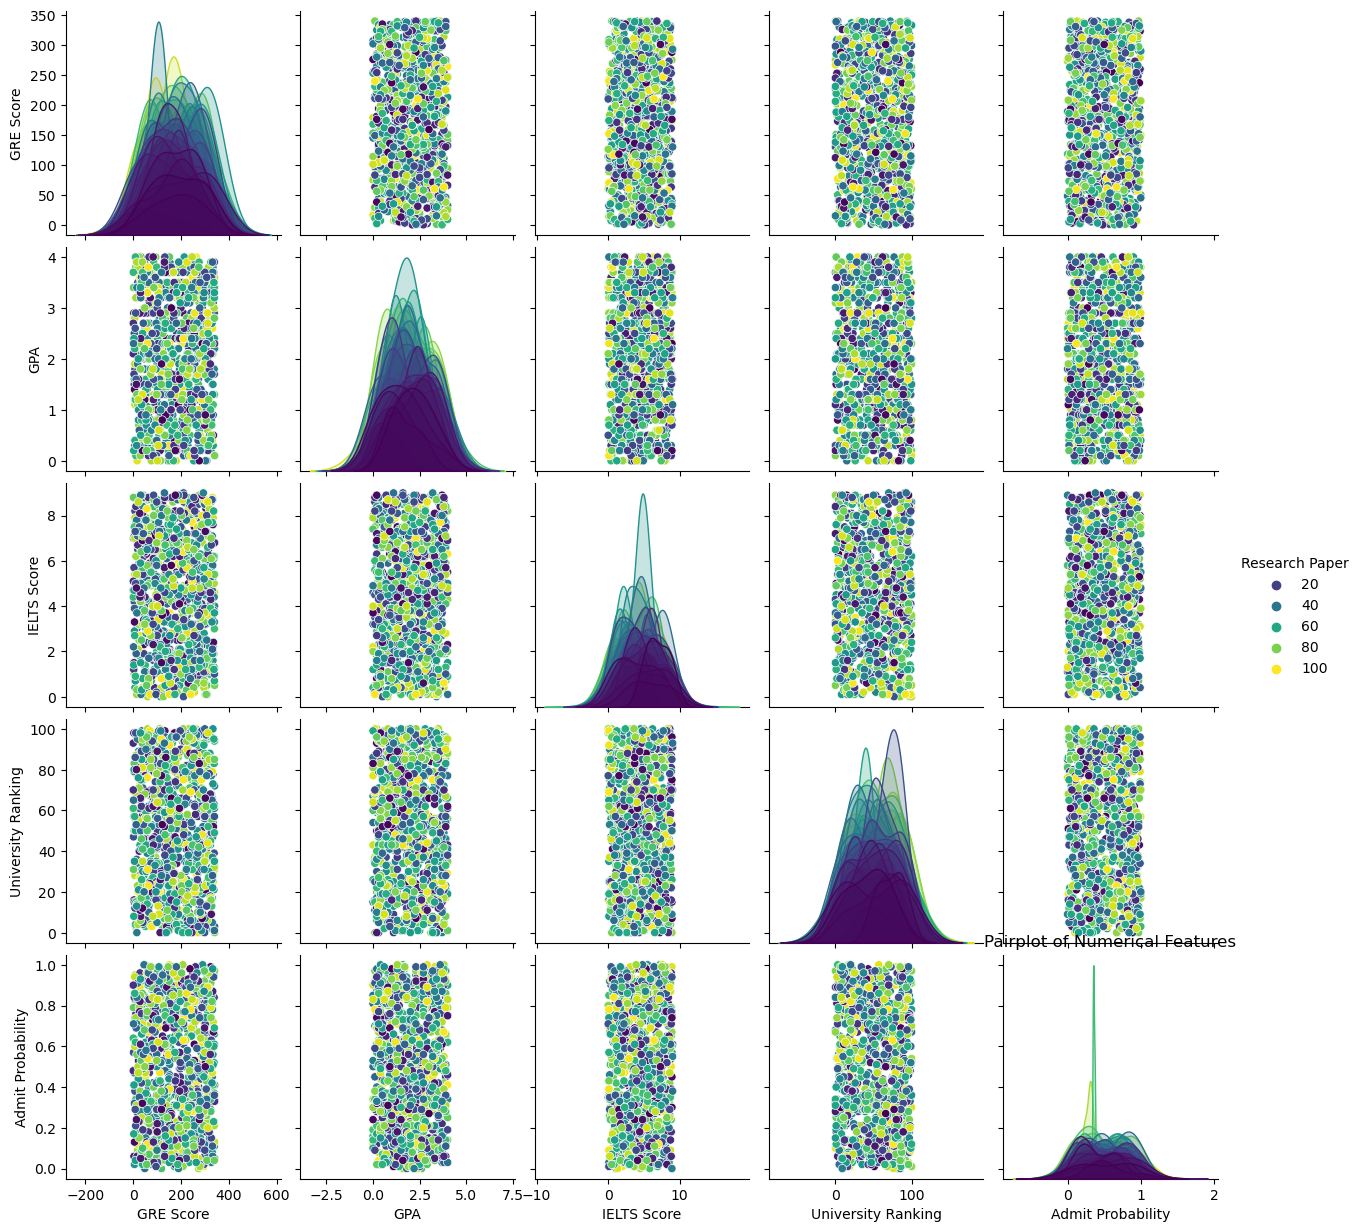

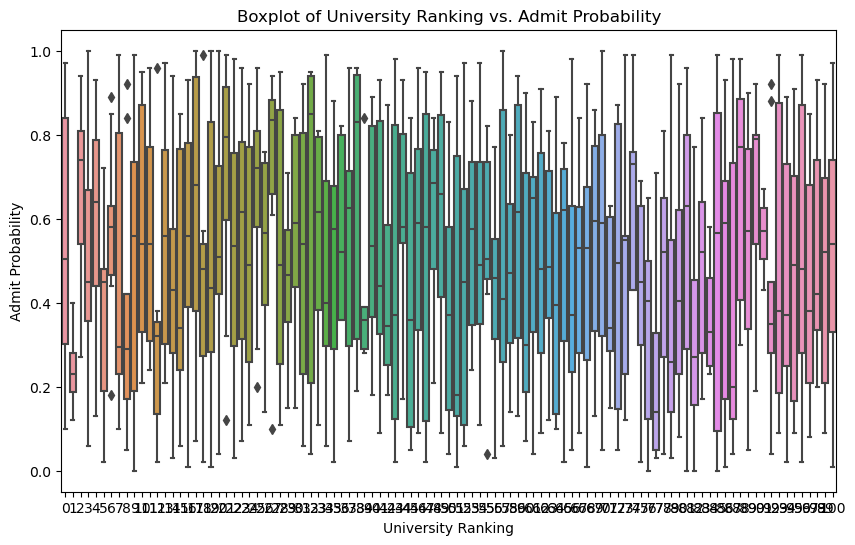

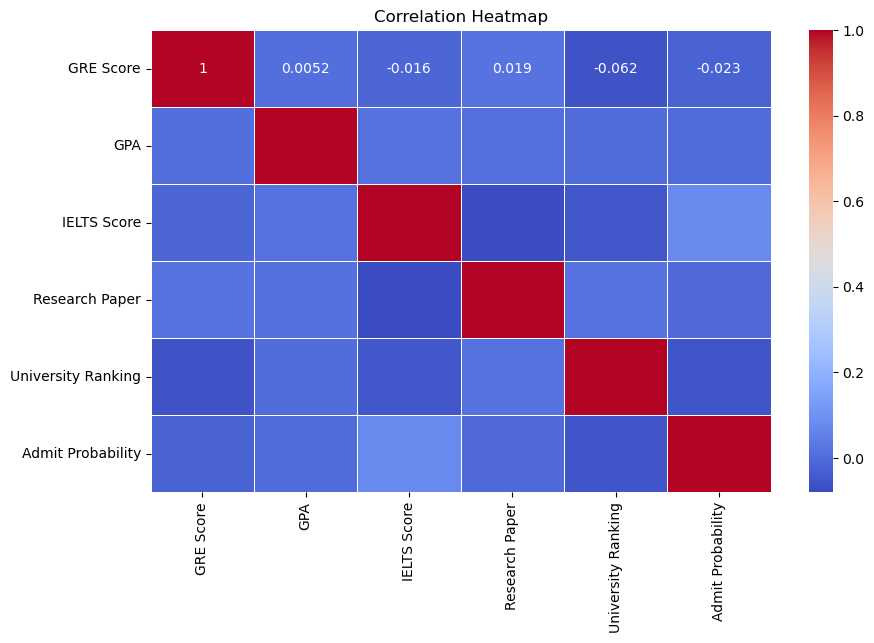

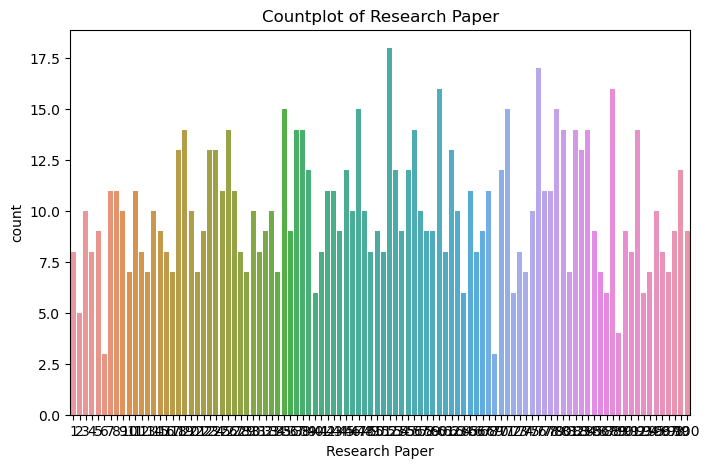

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a CSV file named 'university_data.csv'
# Replace 'university_data.csv' with the actual file path if needed
df = pd.read_csv('university_data.csv')

# Data Exploration and Visualization

# Exclude non-numeric columns before creating the correlation heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_df = df[numeric_columns]

# Pairplot for numerical features
sns.pairplot(df, hue='Research Paper', palette='viridis')
plt.title('Pairplot of Numerical Features')
plt.show()

# Boxplot for University Ranking
plt.figure(figsize=(10, 6))
sns.boxplot(x='University Ranking', y='Admit Probability', data=df)
plt.title('Boxplot of University Ranking vs. Admit Probability')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Countplot for Research Experience
plt.figure(figsize=(8, 5))
sns.countplot(x='Research Paper', data=df)
plt.title('Countplot of Research Paper')
plt.show()


In [46]:
import pickle

# Assuming 'pipeline' is your trained model
with open('trained_us_model.pkl', 'wb') as model_file:
    pickle.dump(Pipeline, model_file)

In [43]:
import os

print(os.getcwd())

C:\Users\admi\University Recommendation System .301978a2-6d72-4ef1-893c-a857a224857c
